## Raw Input Data

The data you'll be working with has been preprocessed from CSVs that looks like this:

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |
| 2.5 | 36.75 | -2.82901631903 | 0.0 |
| 2.75 | 41.65 | -2.82901631903 | 0.0 |
| 3.0 | 46.55 | -2.82901631903 | 0.0 |
| 3.25 | 51.45 | -2.82901631903 | 0.0 |
| 3.5 | 56.35 | -2.82901631903 | 0.0 |

This data is currently saved in a file called `trajectory_example.pickle`. It can be loaded using a helper function we've provided (demonstrated below):

In [1]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


as you can see, each entry in `data_list` contains four fields. Those fields correspond to `timestamp` (seconds), `displacement` (meters), `yaw_rate` (rads / sec), and `acceleration` (m/s/s).

### The Point of this Project!
**Data tells a story but you have to know how to find it!** 

Contained in the data above is all the information you need to reconstruct a fairly complex vehicle trajectory. After processing **this** exact data, it's possible to generate this plot of the vehicle's X and Y position:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3044ac_example-trajectory/example-trajectory.png)

as you can see, this vehicle first accelerates forwards and then turns right until it almost completes a full circle turn.

### Data Explained

**`timestamp`** - Timestamps are all measured in seconds. The time between successive timestamps ($\Delta t$) will always be the same *within* a trajectory's data set (but not *between* data sets).

**`displacement`** - Displacement data from the odometer is in meters and gives the **total** distance traveled up to this point.

**`yaw_rate`** - Yaw rate is measured in radians per second with the convention that positive yaw corresponds to *counter-clockwise* rotation. 

**`acceleration`** - Acceleration is measured in $\frac{m/s}{s}$ and is always **in the direction of motion of the vehicle** (forward). 

> **NOTE** - you may not need to use all of this data when reconstructing vehicle trajectories.

## Your Job
Your job is to complete the following functions, all of which take a processed `data_list` (with $N$ entries, each $\Delta t$ apart) as input:

* `get_speeds` - returns a length $N$ list where entry $i$ contains the speed ($m/s$) of the vehicle at $t = i \times \Delta t$ 

* `get_headings` - returns a length $N$ list where entry $i$ contains the heading (radians, $0 \leq \theta < 2\pi$) of the vehicle at $t = i \times \Delta t$

* `get_x_y` - returns a length $N$ list where entry $i$ contains an `(x, y)` tuple corresponding to the $x$ and $y$ coordinates (meters) of the vehicle at $t = i \times \Delta t$ 

* `show_x_y` - generates an x vs. y scatter plot of vehicle positions. 

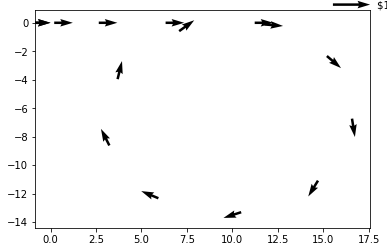

In [2]:
# I've provided a solution file called solution.py
# You are STRONGLY encouraged to NOT look at the code
# until after you have solved this yourself.
#
# You SHOULD, however, feel free to USE the solution 
# functions to help you understand what your code should
# be doing. For example...
from helpers import process_data
import solution

data_list = process_data("trajectory_example.pickle")
solution.show_x_y(data_list)

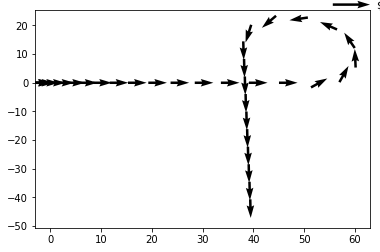

In [3]:
# What about the other trajectories?

three_quarter_turn_data = process_data("trajectory_1.pickle")
solution.show_x_y(three_quarter_turn_data, increment=10)

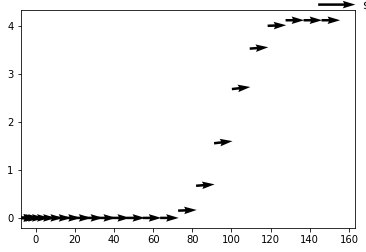

In [4]:
merge_data = process_data('trajectory_2.pickle')
solution.show_x_y(merge_data,increment=10)

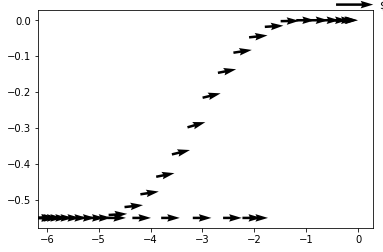

In [5]:
parallel_park = process_data("trajectory_3.pickle")
solution.show_x_y(parallel_park,increment=5)

**How do you make those cool arrows?!**

I did a Google search for "python plot grid of arrows" and the second result led me to some [demonstration code](https://matplotlib.org/examples/pylab_examples/quiver_demo.html) that was really helpful. 

## Testing Correctness
Testing code is provided at the bottom of this notebook. Note that only `get_speeds`, `get_x_y`, and `get_headings` are tested automatically. You will have to "test" your `show_x_y` function by manually comparing your plots to the expected plots. 

### Initial Vehicle State

The vehicle always begins with all state variables equal to zero. This means `x`, `y`, `theta` (heading), `speed`, `yaw_rate`, and `acceleration` are 0 at t=0.

----

## Your Code!
Complete the functions in the cell below. I recommend completing them in the order shown. Use the cells at the end of the notebook to test as you go.

In [148]:
# def get_derivative_from_data(position_data, time_data):
#     # TODO - try your best to implement this code yourself!
#     #        if you get really stuck feel free to go back
#     #        to the previous notebook for a hint.
    
#     previous_position = position_data[0]
#     previous_time = time_data[0]
#     gradients = []
    
#     for i in range(1, len(position_data)):
#         position = position_data[i]
#         time = time_data[i]
        
#         delta_pos = position - previous_position
#         delta_time = time - previous_time
        
#         gradient = delta_pos/delta_time
        
# #         print(gradient, position, previous_position)
        
#         gradients.append(gradient)
        
#         previous_position = position
#         previous_time = time
        
#     return gradients
from math import cos, sin, pi, isnan
from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

def get_speeds(data_list):
    prev_position = data_list[0][1]
    prev_time = data_list[0][0]
    speeds = [0.0]

    for i in range(1, len(data_list)):
        position = data_list[i][1]
        time = data_list[i][0]
        
        delta_pos = position - prev_position
        delta_time = time-prev_time
        
        speed = delta_pos/delta_time
        
        speeds.append(speed)
        
        prev_position = position
        prev_time = time
    return speeds
    

def get_headings(data_list):
    prev_time = data_list[0][0]
    accumulated_heading = 0.0
    headings = [0.0]
    for i in range(1, len(data_list)):
        yaw_rate = data_list[i][2]
        delta_time = data_list[i][0] - prev_time
        
        heading = yaw_rate * delta_time
        accumulated_heading += heading
        headings.append(accumulated_heading)
        
        prev_time = data_list[i][0]
    return headings

def drive_forward(x, y, displacement, heading):
    """
    Updates x and y coordinates of vehicle based on 
    heading and appends previous (x,y) position to
    history.
    """
    if isnan(displacement):
        displacement = 0.0
        
    x += displacement * cos(heading)
    y += displacement * sin(heading)
    return (x, y)

def get_x_y(data_list):
    prev_time = data_list[0][0]
    x_y = []
    x = 0.0
    y = 0.0
    x_y.append((x, y))
#     displacement = 0
    
    speeds = get_speeds(data_list)
    headings = get_headings(data_list)
    
    for i in range(1, len(data_list)):
        
        delta_time = data_list[i][0] - prev_time
        
        displacement = speeds[i] * delta_time
        heading = headings[i]
        
        (x, y) = drive_forward(x, y, displacement, heading)

        x_y.append((x, y))
        prev_time = data_list[i][0]
    
    return x_y

def show_x_y(data_list, increment=5):
    
    XY = get_x_y(data_list)
    headings = get_headings(data_list)
    X  = [d[0] for d in XY]
    Y  = [d[1] for d in XY]
    h_x = np.cos(headings)
    h_y = np.sin(headings)
    Q = plt.quiver(X[::increment],
                   Y[::increment],
                   h_x[::increment],
                   h_y[::increment],
                   units='x',
                   pivot='tip')
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}',
                       labelpos='E', coordinates='figure')
    plt.show()
    
    
  

## Testing
Test your functions by running the cells below.

In [149]:
from testing import test_get_speeds, test_get_x_y, test_get_headings

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


In [150]:
test_get_headings(get_headings)

PASSED test of get_headings function!


In [151]:
test_get_x_y(get_x_y)

PASSED test of get_x_y function!


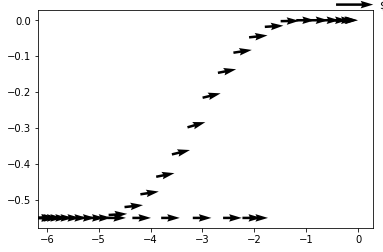

In [152]:
show_x_y(parallel_park)